# WNC Style Classifier - Evaluation

In [2]:
import pandas as pd
from sklearn.metrics import accuracy_score

from src.evaluation import StyleClassifierEvaluation

%load_ext lab_black
%load_ext autoreload
%autoreload 2

![](./images/style_transfer_intensity.jpeg)

In [3]:
# MODEL_PATH = "../models/bert-cls-full3/checkpoint-96000"
MODEL_PATH = "../models/TRIAL-J-shuffle-lr_3en06-epoch_15-wd_.1-bs_32/checkpoint-67466"
CLS_DATASET_PATH = "/home/cdsw/data/processed/WNC_cls_full"

sce = StyleClassifierEvaluation(
    model_identifier=MODEL_PATH, dataset_identifier=CLS_DATASET_PATH
)

  0%|          | 0/309 [00:00<?, ?ba/s]

  0%|          | 0/18 [00:00<?, ?ba/s]

  0%|          | 0/18 [00:00<?, ?ba/s]

In [4]:
sce.evaluate()

100%|██████████| 2152/2152 [00:31<00:00, 68.80it/s]


In [5]:
sce.metric_df

,text,true_label,pred_label,pred_score
0,"djibouti, as well as the puntland and somalila...",0,1,0.719060
1,"djibouti, as well as the puntland and somalila...",1,1,0.753944
2,he is now a varsity basketball head coach for ...,0,0,0.991680
3,he is now a varsity basketball head coach for ...,1,1,0.952006
4,"most notably, on september 11, 2011, the bushe...",0,0,0.771454
...,...,...,...,...
17209,"joseph ""sepp"" blatter (born 10 march 1936) is ...",1,1,0.623496
17210,"in the face of this uncomplimentary labeling ,...",0,0,0.775046
17211,"in the face of this label of ""heresy"" , samuel...",1,0,0.511837
17212,"for one, it illustrates nietzsche's evolution ...",0,1,0.530755


## Performance Metrics 

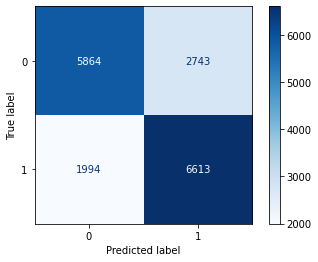

In [6]:
sce.plot_confusion_matrix()

In [7]:
sce.get_classification_report()

,precision,recall,f1-score,support
0,0.746,0.681,0.712,8607.000
1,0.707,0.768,0.736,8607.000
accuracy,0.725,0.725,0.725,0.725
macro avg,0.727,0.725,0.724,17214.000
weighted avg,0.727,0.725,0.724,17214.000


## Metrics by Cohort

In [8]:
sce.metric_df["num_tokens"] = sce.metric_df.apply(
    lambda x: len(x["text"].split(" ")), axis=1
)

In [9]:
sce.metric_df

,text,true_label,pred_label,pred_score,num_tokens
0,"djibouti, as well as the puntland and somalila...",0,1,0.719060,18
1,"djibouti, as well as the puntland and somalila...",1,1,0.753944,14
2,he is now a varsity basketball head coach for ...,0,0,0.991680,23
3,he is now a varsity basketball head coach for ...,1,1,0.952006,15
4,"most notably, on september 11, 2011, the bushe...",0,0,0.771454,27
...,...,...,...,...,...
17209,"joseph ""sepp"" blatter (born 10 march 1936) is ...",1,1,0.623496,53
17210,"in the face of this uncomplimentary labeling ,...",0,0,0.775046,34
17211,"in the face of this label of ""heresy"" , samuel...",1,0,0.511837,35
17212,"for one, it illustrates nietzsche's evolution ...",0,1,0.530755,28


In [10]:
# calculate accuracy by group and format as dataframe for plotting

acc_by_numtokens = sce.metric_df.groupby("num_tokens").apply(
    lambda x: {
        "accuracy": accuracy_score(y_true=x["true_label"], y_pred=x["pred_label"]),
        "support": x["true_label"].count(),
    }
)

acc_by_numtokens_df = pd.DataFrame(
    acc_by_numtokens.tolist(), index=acc_by_numtokens.index
)

<AxesSubplot:title={'center':'Accuracy by Length of Text'}, xlabel='num_tokens'>

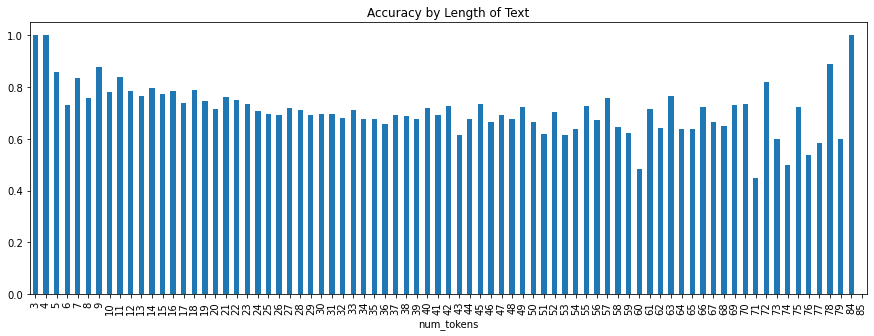

In [11]:
acc_by_numtokens_df["accuracy"].plot(
    kind="bar", figsize=(15, 5), title="Accuracy by Length of Text"
)

## Error Analysis

<AxesSubplot:title={'center':'Distribution of Predicted Scores'}, ylabel='Frequency'>

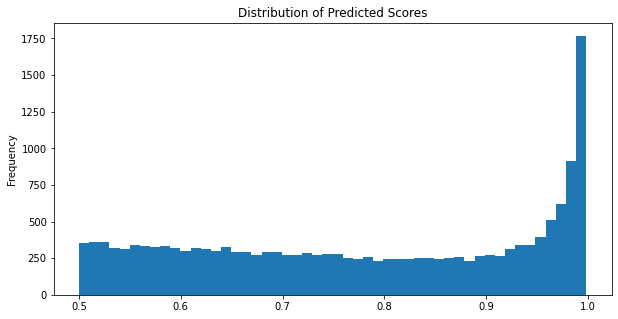

In [12]:
sce.metric_df.pred_score.plot(
    kind="hist", bins=50, title="Distribution of Predicted Scores", figsize=(10, 5)
)

<AxesSubplot:title={'center':'Distribution of Predicted Scores'}, ylabel='Frequency'>

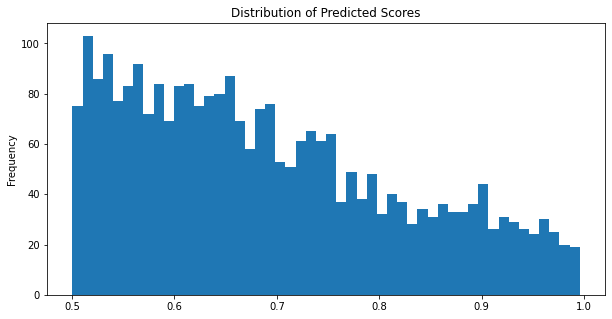

In [18]:
sce.metric_df[
    (sce.metric_df.true_label == 0) & (sce.metric_df.pred_label == 1)
].sort_values(by="pred_score", ascending=False).pred_score.plot(
    kind="hist", bins=50, title="Distribution of Predicted Scores", figsize=(10, 5)
)

<AxesSubplot:title={'center':'Distribution of Predicted Scores'}, ylabel='Frequency'>

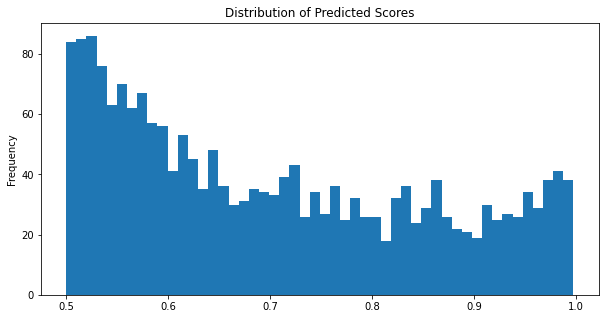

In [19]:
sce.metric_df[
    (sce.metric_df.true_label == 1) & (sce.metric_df.pred_label == 0)
].sort_values(by="pred_score", ascending=False).pred_score.plot(
    kind="hist", bins=50, title="Distribution of Predicted Scores", figsize=(10, 5)
)

### Severe False Positives (i.e. predicted `neutral` when actually `subjective`)

**Observations:**
- Some are legitimate model errors: 2492, 7358, 4644, 16594
- Some seem to be factual corrections: 15812, 14988, 11222, 9262
- Some are spelling / grammer corrections: 11444, 6410, 16954

In [25]:
sce.metric_df

,text,true_label,pred_label,pred_score,num_tokens
0,"djibouti, as well as the puntland and somalila...",0,1,0.719060,18
1,"djibouti, as well as the puntland and somalila...",1,1,0.753944,14
2,he is now a varsity basketball head coach for ...,0,0,0.991680,23
3,he is now a varsity basketball head coach for ...,1,1,0.952006,15
4,"most notably, on september 11, 2011, the bushe...",0,0,0.771454,27
...,...,...,...,...,...
17209,"joseph ""sepp"" blatter (born 10 march 1936) is ...",1,1,0.623496,53
17210,"in the face of this uncomplimentary labeling ,...",0,0,0.775046,34
17211,"in the face of this label of ""heresy"" , samuel...",1,0,0.511837,35
17212,"for one, it illustrates nietzsche's evolution ...",0,1,0.530755,28


In [28]:
sce.highlight_classification_errors(kind="fp", n=50)

Record #4644 classified as NEUTRAL, when actual label is SUBJECTIVE: 
	 he chose to leave the promotion after his contract expired in 2000.

Here's its NEUTRAL labeled counterpart #4645: 
	 he left the promotion after his contract expired in 2000.
---------------------------------------------------------------------

Record #2238 classified as NEUTRAL, when actual label is SUBJECTIVE: 
	 james barbour, is a singer and an actor.

Here's its NEUTRAL labeled counterpart #2239: 
	 james barbour, is a singer and broadway actor.
---------------------------------------------------------------------

Record #15812 classified as NEUTRAL, when actual label is SUBJECTIVE: 
	 shirley maclaine replaced marilyn , kiss me, stupid, a comedy starring dean martin , kim novak took on the 'floozy ' role of 'polly the pistol' and a musical version of a tree grows in brooklyn.

Here's its NEUTRAL labeled counterpart #15813: 
	 (in which shirley maclaine would replace her) , kiss me, stupid, a comedy starrin

### Severe False Negatives (i.e. predicted `subjective` when actually `neutral`)

**Observations:**
- Error with the dataset labels (i.e. these are actually subjective): 15029, 4419, 10673, 6027, 5235, 2317
    - Often in these examples, one instance of subjectivity is removed, but another still exists, so classifier is not actually wrong... 6027
    

In [23]:
sce.metric_df.loc[5234:5235]

,text,true_label,pred_label,pred_score,num_tokens
5234,the patriotic nigras (also known by the initia...,0,1,0.89485,21
5235,the patriotic nigras (also known by the initia...,1,0,0.99514,22


In [29]:
sce.highlight_classification_errors(kind="fn", n=50)

Record #8099 classified as SUBJECTIVE, when actual label is NEUTRAL: 
	 julia scarlett elizabeth louis-dreyfus (born january 13, 1961) is an american actor and comedienne best known for her roles as elaine benes on the nbc sitcom seinfeld in the 1990s, and as christine campbell on the current cbs sitcom the new adventures of old christine.

Here's its SUBJECTIVE labeled counterpart #8098: 
	 julia scarlett elizabeth louis-dreyfus (born january 13, 1961) is an american actress and comedienne best known for her roles as elaine benes on the nbc sitcom seinfeld in the 1990s, and as christine campbell on the current cbs sitcom the new adventures of old christine.
---------------------------------------------------------------------

Record #15029 classified as SUBJECTIVE, when actual label is NEUTRAL: 
	 roger federer (born august 8, 1981) is a talented swiss professional tennis player.

Here's its SUBJECTIVE labeled counterpart #15028: 
	 roger federer (born august 8, 1981) is a unbelievab